**INTRODUCTION**

This notebook aims to explore and analyze a dataset containing information about houses in given District X. The dataset is comprised of 13 attributes, each providing valuable insights into the characteristics of houses within the district. The main objective of this analysis is to create a simple predictive model for the "Median House Value," which serves as the output attribute.

The primary task involves exploring the dataset, understanding the relationships between different attributes, and developing a simple predictive model for the "Median House Value." This notebook will walk through data preprocessing, exploratory data analysis, feature engineering, model selection, and evaluation.

#**TABLE OF CONTENT**
  1. Import Libraries
  2. Get Data
  3. Explore Data
  4. Data Preparation
  5. Train/Test Split
  6. Train Model
  7. Fine Tuning






# **IMPORT LIBRARIES**

In [3]:
# Common imports
import pandas as pd
import numpy as np
import seaborn as sns

# data visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# random seed to make output stable across runs
np.random.seed(42)

# data visualization
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# **GET DATA**

In [4]:
# Read data
housing = "https://raw.githubusercontent.com/trangmx/fdc104/main/datasets/distict_x_houses/District_X_Houses.csv"
housing = pd.read_csv(housing)
housing


,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [5]:
#Check the heading
housing = pd.read_csv("https://raw.githubusercontent.com/trangmx/fdc104/main/datasets/distict_x_houses/District_X_Houses.csv")
housing.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


#**EXPLORE DATA**

In [6]:
#Check the type and missing value
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

Notice that there are 20,640 instances (entries) in the whole dataset. And all the attributes are non-null, which means that there are no missing values in all columns. The data types vary, with numerical values expressed as floating-point numbers (float64) for some attributes and integers (int64) for others.


In [7]:
#Check categorical features
housing.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


The summary statistics for the provided dataset offer a comprehensive view of various housing-related attributes across 20,640 instances or districts. All attributes have complete data for every district, highlighting a dataset with no missing values.

For 'Median_House_Value,' the central tendency is represented by a mean of 206,855.82, with a notable standard deviation of 115,395.62, emphasizing considerable variability in house values. The range spans from a minimum value of 14,999 to a maximum of 500,001, illustrating the diversity in housing prices.

'Median_Income' exhibits a mean of 3.87, with a standard deviation of nearly 1.90. The range extends from a minimum income of 0.50 to a maximum of 15.00, encapsulating a broad spectrum of income levels across districts.

Regarding 'Median_Age,' the mean is approximately 28.64 years, with a standard deviation of 12.59. The range spans from a minimum age of 1 year to a maximum of 52 years, indicating a varied distribution of age demographics.

The statistical details for other attributes, such as 'Tot_Rooms,' 'Tot_Bedrooms,' 'Population,' 'Households,' 'Latitude,' 'Longitude,' 'Distance_to_coast,' 'Distance_to_LA,' 'Distance_to_SanDiego,' 'Distance_to_SanJose,' and 'Distance_to_SanFrancisco,' follow a similar pattern of presenting central tendency, dispersion, and range, thereby offering a comprehensive portrait of the dataset's characteristics.

array([[<Axes: title={'center': 'Median_House_Value'}>,
        <Axes: title={'center': 'Median_Income'}>,
        <Axes: title={'center': 'Median_Age'}>,
        <Axes: title={'center': 'Tot_Rooms'}>],
       [<Axes: title={'center': 'Tot_Bedrooms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Households'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Distance_to_coast'}>,
        <Axes: title={'center': 'Distance_to_LA'}>,
        <Axes: title={'center': 'Distance_to_SanDiego'}>],
       [<Axes: title={'center': 'Distance_to_SanJose'}>,
        <Axes: title={'center': 'Distance_to_SanFrancisco'}>, <Axes: >,
        <Axes: >]], dtype=object)

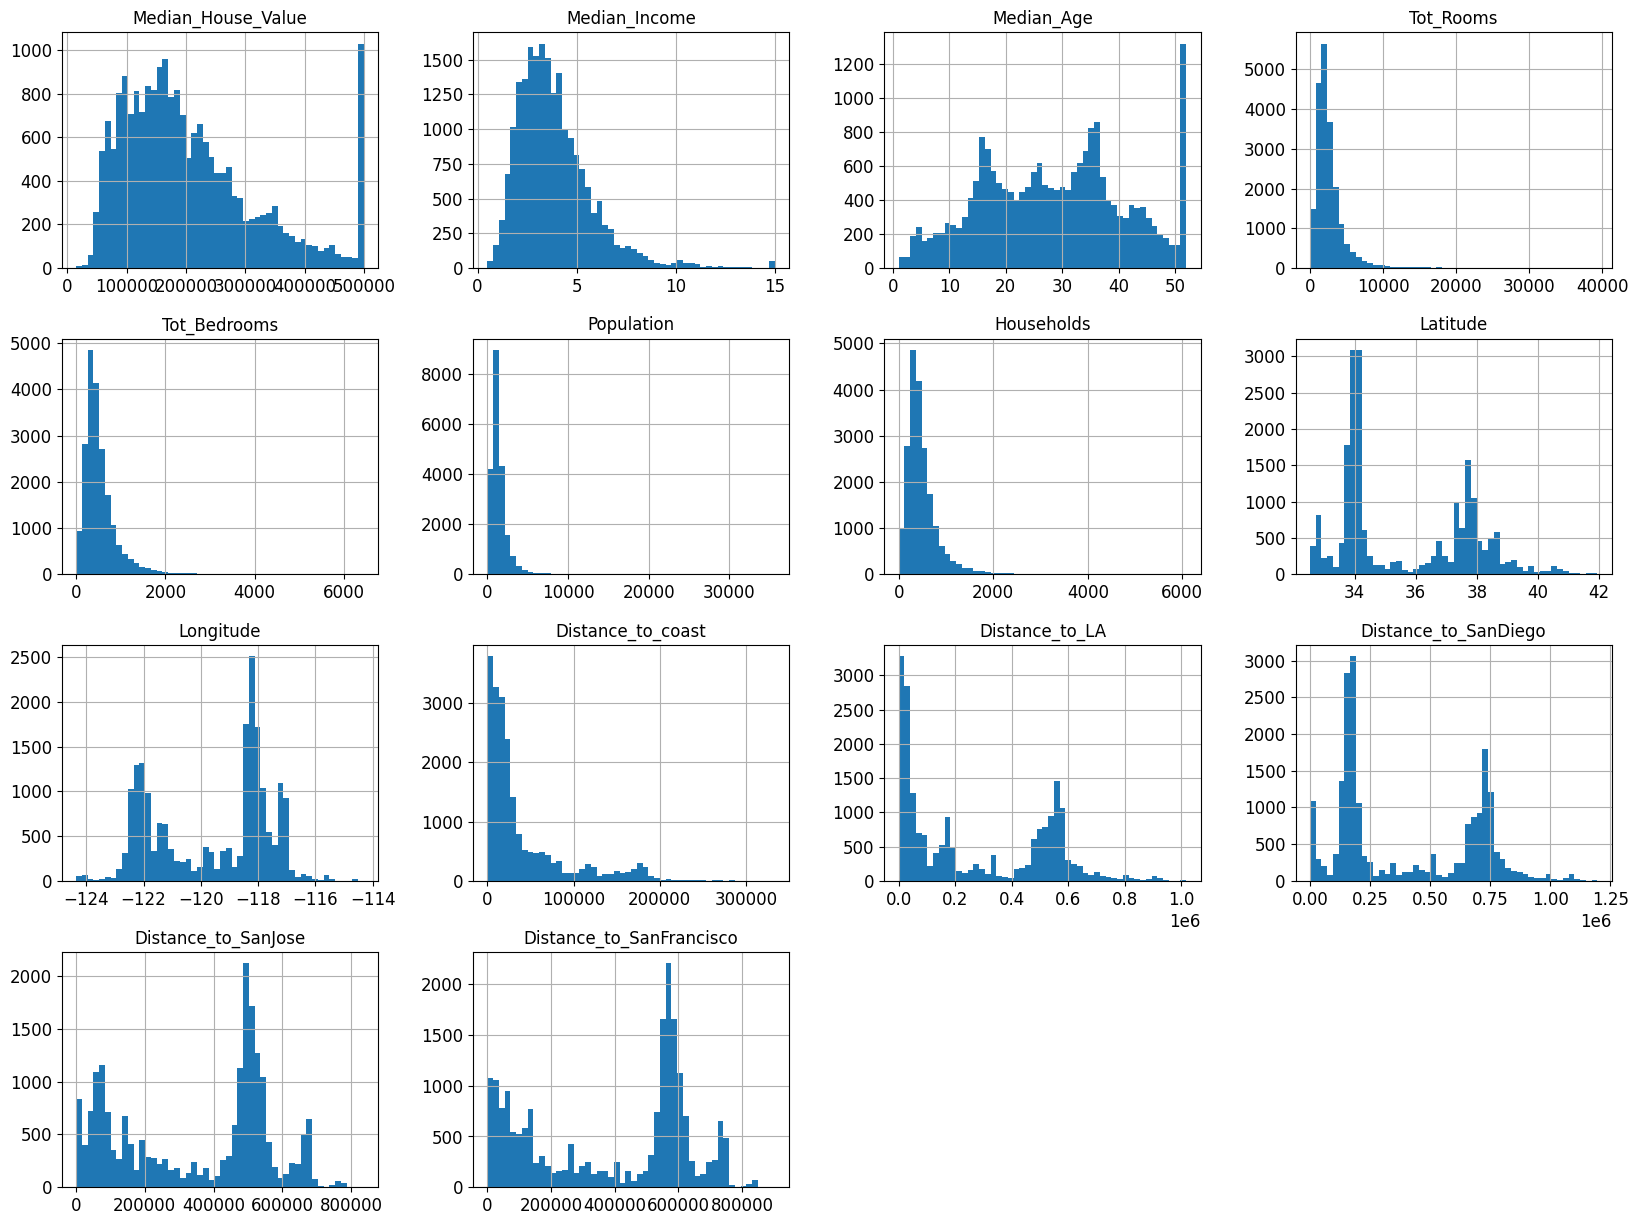

In [8]:
%matplotlib inline
housing.hist(bins=50, figsize=(20, 15))

This is noticable from those histograms that:


*   The attributes have varying scales, which we will discuss later on in this post.
*   Many of the histograms are "tail heavy" which means that they extend further to the right of the median than to the left which makes it harder for an algorithm to detect patterns. We will transform the later on.

*   The median_income attribute is not in US Dollar because the data has been scaled and capped at 15.0001 and at 0.4999. This is called a "preprocessed attribute" and is common within machine learning.
*   The median_age and the median_house_value attributes are also capped. That the median_house_value is capped could be a serious problem, because this is our label (what you want to predict) and our model could learn that the price never goes beyond that limit. In this case we only have the option to remove the capped one or to collect the right labels for them.




#**DATA PREPARATION**

**EDA**

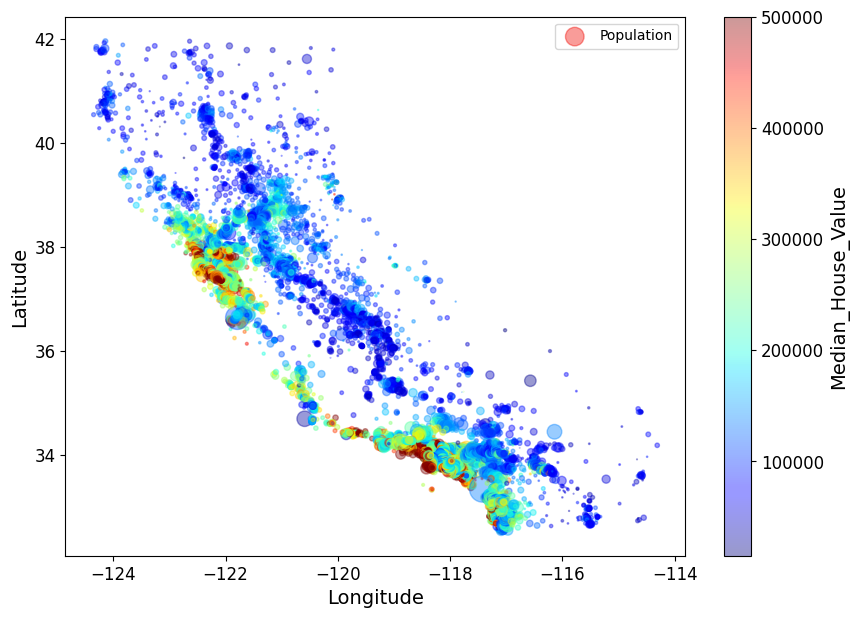

In [9]:
housing.plot(kind="scatter",               # Loại biểu đồ (scatter plot)
        x="Longitude", y="Latitude",  # Cột cho trục x và y
        alpha=0.4,                     # Độ trong suốt của điểm
        s=housing["Population"]/100,        # Kích thước của điểm dựa trên dân số
        label="Population",            # Nhãn cho chú thích
        figsize=(10,7),                # Kích thước của hình vẽ
        c="Median_House_Value",        # Cột chứa giá trị màu sắc
        cmap=plt.get_cmap("jet"),      # Bảng màu cho giá trị màu sắc
        colorbar=True,                 # Hiển thị thanh màu
        sharex=False)                  # Không chia sẻ trục x giữa các đồ thị con
plt.legend()


On the scatterplot we can see, seem like that the housing prices are related to the location and to the population density. For example, the higher the population, the lower Median House value (Negative Relationship)

<Axes: xlabel='Median_Income', ylabel='Median_House_Value'>

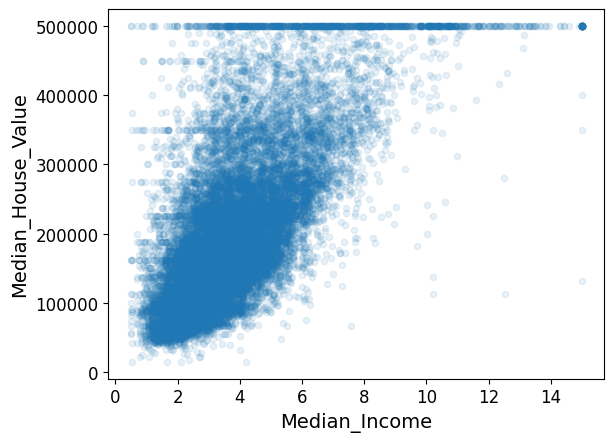

In [10]:
housing.plot(kind="scatter", x="Median_Income", y="Median_House_Value", alpha=0.1)

Positive Relationship.

In [11]:
housing.corr().loc['Median_House_Value'].to_frame().sort_values(by ='Median_House_Value',ascending=True)

,Median_House_Value
Distance_to_coast,-0.469350
Latitude,-0.144160
Distance_to_LA,-0.130678
Distance_to_SanDiego,-0.092510
Longitude,-0.045967
Distance_to_SanJose,-0.041590
Distance_to_SanFrancisco,-0.030559
Population,-0.024650
Tot_Bedrooms,0.050594
Households,0.065843


Seems like the median_income is correlated the most with the median house value because the correlation between house price and income is 0.688075. If the correlation coefficient between house prices and Distance_to_coast is -0.469350, there is a strong negative correlation between the two variables. Assuming house prices increase, Distance_to_coast decreases, and vice versa.

In [12]:
housing["rooms_per_household"] = housing["Tot_Rooms"]/housing["Households"] # tỉ lệ số phòng trong hộ gia đình
housing["bedrooms_per_room"] = housing["Tot_Bedrooms"]/housing["Tot_Rooms"] #  tỉ lệ phòng ngủ so với tổng số các phòng trong 1 nhà
housing["population_per_household"]=housing["Population"]/housing["Households"] # tỉ lệ dân số trong 1 hộ gia đình

In [13]:
housing.corr().loc['Median_House_Value'].to_frame().sort_values(by ='Median_House_Value',ascending=True)

,Median_House_Value
Distance_to_coast,-0.469350
bedrooms_per_room,-0.255624
Latitude,-0.144160
Distance_to_LA,-0.130678
Distance_to_SanDiego,-0.092510
Longitude,-0.045967
Distance_to_SanJose,-0.041590
Distance_to_SanFrancisco,-0.030559
Population,-0.024650
population_per_household,-0.023737


As we can see, that the bedrooms_per_room attribute is more correlated with the median house value than the total number of rooms or bedrooms. Houses with a lower bedroom/room ratio tend to be more expensive. The rooms_per_household attribute is also better than the total number of rooms in a district. Obviously the larger the house, the higher the price.

In [14]:
drop_col = ['rooms_per_household', 'population_per_household', 'bedrooms_per_room']
housing.drop(drop_col, axis = 1)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


# Train/Test Split

In [15]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), "Train Instances +", len(test_set), "Test Instances")

16512 Train Instances + 4128 Test Instances


In [17]:
housing["income_categories"] = np.ceil(housing["Median_Income"] / 1.5)
housing["income_categories"].where(housing["income_categories"] < 5, 5.0, inplace=True)

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_categories"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [19]:
def income_categories_proportions(data):
    return data["income_categories"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_categories_proportions(housing),
    "Stratified": income_categories_proportions(strat_test_set),
    "Random": income_categories_proportions(test_set),
}).sort_index()

In [20]:
compare_props

,Overall,Stratified,Random
1.0,0.039826,0.039971,0.040213
2.0,0.318847,0.318798,0.324370
3.0,0.350581,0.350533,0.358527
4.0,0.176308,0.176357,0.167393
5.0,0.114438,0.114341,0.109496


In [21]:
housing  = housing.drop(['income_categories'], axis=1)

In [22]:
housing = strat_train_set.drop("Median_House_Value", axis=1) # drop labels for training set
housing_labels = strat_train_set["Median_House_Value"].copy()

**Custom transfer**

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [24]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,rooms_per_household,bedrooms_per_room,population_per_household,income_categories,rooms_per_household,population_per_household
0,2.1736,29.0,3873.0,797.0,2237.0,706.0,38.52,-121.46,50599.144593,574274.925963,753124.681591,137078.744622,118723.941210,5.485836,0.205784,3.168555,2.0,20.690550,18.328141
1,6.3373,7.0,5320.0,855.0,2015.0,768.0,33.09,-117.23,8352.411462,142364.339312,42110.615570,634096.090137,702125.436423,6.927083,0.160714,2.623698,5.0,25.838622,23.209429
2,2.8750,44.0,1618.0,310.0,667.0,300.0,35.37,-119.04,117772.799313,163609.893613,342147.509042,336190.704566,403888.983324,5.393333,0.191595,2.223333,2.0,8.764490,8.481764
3,2.2264,24.0,1877.0,519.0,898.0,483.0,32.75,-117.13,8542.074776,177916.946814,4792.830835,669117.781727,737103.754121,3.886128,0.276505,1.859213,2.0,15.847328,14.748092
4,4.4964,27.0,3536.0,646.0,1837.0,580.0,34.28,-118.70,28788.098950,49030.492265,224975.060180,445290.745173,513253.823084,6.096552,0.182692,3.167241,3.0,18.844807,16.919487



**Pipelines for tranformation**

There are a lot of data tranformation steps that also need to be done in the right order. To help you with that, sklearn provides the **Pipeline** class. In the code below, you can see a small pipeline of attributes:

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

additional_features = ["rooms_per_household", "bedrooms_per_room", "population_per_household"]

num_pipeline = Pipeline([('std_scaler', StandardScaler())])
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, additional_features),
  ])

The Pipeline constructor takes a list of name/estimator pairs, which define a sequence of steps. Note that all instead of the last estimator must be transformers, which means that they must have a fit_transform() method.

In [27]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.01739526, -0.12449975,  0.00622264],
       [ 0.56925554, -0.90901266, -0.04081077],
       [-0.01802432, -0.37148599, -0.07537122],
       ...,
       [-0.5092404 ,  0.38049366, -0.03743619],
       [ 0.32814891, -0.50655192, -0.05915604],
       [ 0.01407228, -0.12515371,  0.00657083]])

# **TRAIN MODEL**

**LINEAR REGRESSION**

First, let's test whether a Linear Regression model gives us a satisfying result:

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Let's try it out on the training set:

In [29]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210544.99380008 235624.74012623 217385.994508   173110.07305412
 223053.16187144]


In [30]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Let's use RMSE (Root Mean Squared Error) to judge the quality of our predictions:

In [31]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

111567.81577841828

This is clearly not a great score. Since most districts median_housing_values range between 120,000 and 265,000 dollar, a prediction error of $111,567 is absolutely unsatisfying and also an example of a model underfitting the data. This either means that the features do not provide enough information to make proper predictions, or that the model is just not powerful enough.

**DECISION TREE REGRESSOR**

Let's use a DecisionTreeRegressor, which can find complex nonlinear relationships in the data:

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

Let's try it out on the training set:

In [33]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

To test how our model performs if we can't use the test data, we use K-Fold Cross-Validation

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

Let's look at the result:

In [35]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [131885.94744598 126511.7044258  126234.18329359 131268.18260515
 129031.540476   132789.71604356 132268.98427691 129842.78696337
 129588.33835507 128926.62377937]
Mean: 129834.80076648101
Standard deviation: 2155.383848939273


Let's compute the scores for our linear regression model again, but using K-Fold Cross-Validation:

In [36]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [111798.53773798 110387.51452259 110294.80631477 112945.1123457
 109685.23786235 115316.05211038 112277.06168985 111446.54761274
 111782.13715755 111010.45014604]
Mean: 111694.34574999489
Standard deviation: 1525.4981255903574


**RANDOM FOREST REGRESSOR**

Now we definitely know that our decision tree model is overfitting and performs worse than our linear regression model. Now let's try one last model, the RandomForestRegressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [38]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

35505.81139186557

In [42]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [94934.18174662 95639.82116812 91891.56364716 95916.2521689
 92114.57159884 96976.36221919 97045.42407851 94964.26132186
 93088.71494385 94491.82633868]
Mean: 94706.29792317275
Standard deviation: 1743.0140933643902


# **FINE TUNING**

**Grid Search**

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [43]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [44]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

106612.48516647251 {'max_features': 2, 'n_estimators': 3}
98028.29396343435 {'max_features': 2, 'n_estimators': 10}
95233.07978993037 {'max_features': 2, 'n_estimators': 30}
106597.36513586105 {'max_features': 4, 'n_estimators': 3}
98248.21243874312 {'max_features': 4, 'n_estimators': 10}
95729.90654749336 {'max_features': 4, 'n_estimators': 30}
106597.36513586105 {'max_features': 6, 'n_estimators': 3}
98248.21243874312 {'max_features': 6, 'n_estimators': 10}
95729.90654749336 {'max_features': 6, 'n_estimators': 30}
106597.36513586105 {'max_features': 8, 'n_estimators': 3}
98248.21243874312 {'max_features': 8, 'n_estimators': 10}
95729.90654749336 {'max_features': 8, 'n_estimators': 30}
109852.48346679604 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
102800.08998296554 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
125825.38179021403 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
125114.99863425326 {'bootstrap': False, 'max_features': 3, 'n_estimat

# **EVALUATION**

In [45]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("Median_House_Value", axis=1)
y_test = strat_test_set["Median_House_Value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [46]:
final_rmse

93670.61234692087

We now have a final predicton error of $93,670. Usually the performance on the test set is slightly worse, because our system is fine tuned to perform well on the training set.

# **SUMMARY**

In general, in terms of positive relationship, median_income has the strongest correlation with median_house_value. This means that the higher the income of household owners, the higher the median value of house that they own. With regard to negative relationship, distance_to_coast negatively correlates the most with median_house_value. It is understandable that the blocks of houses nearer to the beach tend to cost higher. Also, median house value is related to geographic location and population density.

We also add three new columns regarding population and rooms per household and ratio of bedrooms to rooms to the new dataframe in order to have a more panoramic view and better results.

We tried to apply three types of predictive models including Linear Regression, Decision Tree and Random Forest Regressor to predict Median House Value. However, RMSE of Linear Regression model is relatively high compared to the range of median house value, showing the signal of underfitting data. Meanwhile, Decision Tree model is overfitting the data and performs even worse than Linear Regression model. It appears that Random Forest model should be selected with lower prediction error.